In [1]:
import jax
import jax.numpy as jnp
from jax import jit
from jax.lib import xla_bridge
from jax.lax import scan
from jax import random
import plotly.express as px
import MCsampler as mc

from matplotlib import gridspec
import matplotlib.pyplot as plt

# Normal Distribution

In [2]:
@jit
def P(x):
    return jnp.exp(-(x-1)**2/(2*0.1))

In [3]:
sampler = mc.Metro_Has(P,1)

In [4]:
v_n = sampler.sample(2, 1000, burn = 50)

1206 points accepted in 6.979884840000523 s.


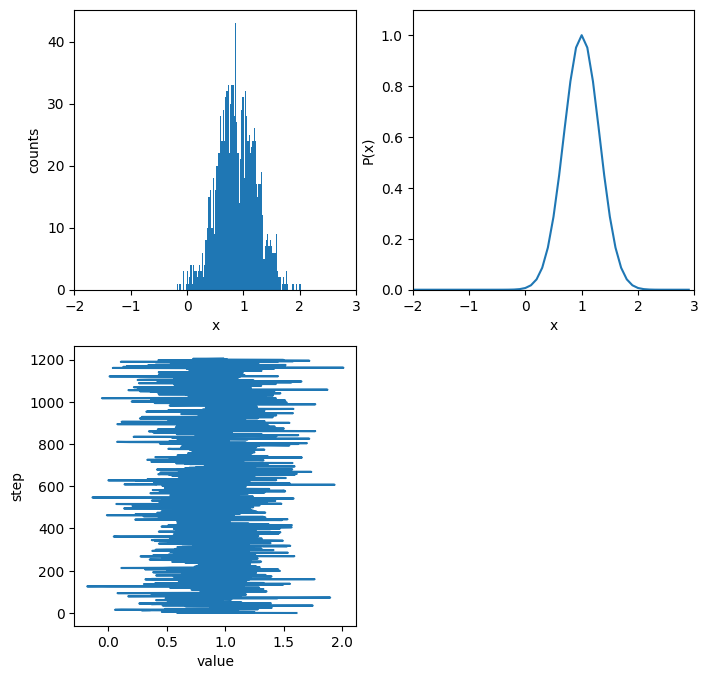

In [5]:
fig = plt.figure(figsize=(8, 8))

# Set up a 2x2 GridSpec
gs = gridspec.GridSpec(2, 2, figure=fig)

# Add three subplots in an "L" shape
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
ax3 = fig.add_subplot(gs[1, 0])  # Bottom-left

ax1.hist(v_n, bins = 100)
ax1.set_xlabel('x')
ax1.set_ylabel('counts')
ax1.set_xlim(-2,3)

ax2.plot(jnp.arange(-2,3,0.1),P(jnp.arange(-2,3,0.1)))
ax2.set_xlim(-2,3)
ax2.set_ylim(0,1.1)
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')


ax3.plot(v_n,jnp.arange(len(v_n)))
ax3.set_xlabel('value')
ax3.set_ylabel('step')

plt.show()

# Crazy distribution

In [6]:
@jit
def P(x):
    return jnp.exp(-x**2)*(2+jnp.sin(5*x)+jnp.sin(2*x))

In [7]:
sampler = mc.Metro_Has(P,1)

In [8]:
v = sampler.sample(1, 5000, burn = 50)

5289 points accepted in 8.316050413000994 s.


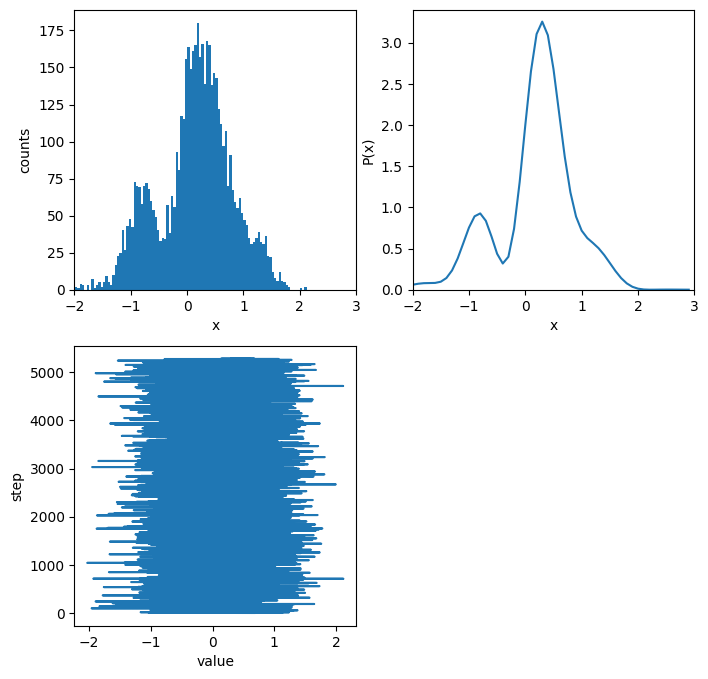

In [9]:
fig = plt.figure(figsize=(8, 8))

# Set up a 2x2 GridSpec
gs = gridspec.GridSpec(2, 2, figure=fig)

# Add three subplots in an "L" shape
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1])  # Top-right
ax3 = fig.add_subplot(gs[1, 0])  # Bottom-left

ax1.hist(v, bins = 100)
ax1.set_xlabel('x')
ax1.set_ylabel('counts')
ax1.set_xlim(-2,3)

ax2.plot(jnp.arange(-2,3,0.1),P(jnp.arange(-2,3,0.1)))
ax2.set_xlim(-2,3)
ax2.set_ylim(0,3.4)
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')

ax3.plot(v,jnp.arange(len(v)))
ax3.set_xlabel('value')
ax3.set_ylabel('step')

plt.show()